In [393]:
# 1. Importing the required libraries for EDA
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multinomial

### EDA

In [394]:
# 2. Loading the data into the DataFrame
df = pd.read_csv("../data/data_for_EDA.csv", index_col=0)
# Display the top 5 rows 
df.head()

,name,price,rating,distance,latitude,longitude,bikes_available
0,Coffee & Whisky House,3.0,8.8,657,53.011939,18.611414,5
1,Coffee & Whisky House,3.0,8.8,603,53.012029,18.596202,6
2,Coffee & Whisky House,3.0,8.8,229,53.009622,18.600228,4
3,Coffee & Whisky House,3.0,8.8,211,53.007485,18.600735,6
4,Coffee & Whisky House,3.0,8.8,832,53.015745,18.607203,9


In [395]:
# 3. Checking the types of data
df.dtypes

name                object
price              float64
rating             float64
distance             int64
latitude           float64
longitude          float64
bikes_available      int64
dtype: object

In [396]:
df.describe()

,price,rating,distance,latitude,longitude,bikes_available
count,441.000000,410.000000,731.000000,731.000000,731.000000,731.000000
mean,1.537415,5.432439,544.838577,53.019887,18.608653,6.287278
std,0.690245,1.940634,795.464264,0.012190,0.029322,1.550816
min,1.000000,1.000000,6.000000,52.992563,18.518344,2.000000
25%,1.000000,4.000000,244.000000,53.012702,18.591969,5.000000
50%,1.000000,5.000000,480.000000,53.019033,18.601746,6.000000
75%,2.000000,7.200000,742.000000,53.025994,18.619199,7.000000
max,4.000000,8.800000,14936.000000,53.055472,18.701141,9.000000


In [397]:
# 4. Dropping irrelevant columns
df = df.drop(['name'], axis=1)
df.head()

,price,rating,distance,latitude,longitude,bikes_available
0,3.0,8.8,657,53.011939,18.611414,5
1,3.0,8.8,603,53.012029,18.596202,6
2,3.0,8.8,229,53.009622,18.600228,4
3,3.0,8.8,211,53.007485,18.600735,6
4,3.0,8.8,832,53.015745,18.607203,9


In [398]:
# 5. Renaming the columns
# df = df.rename(columns={"Column_Name": "New_Name"})
# df.head()

In [399]:
# 6. Dropping the duplicate rows
print(f'DataFrame before dropping duplicates {df.shape}')
duplicates_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicates_df.shape)
# Count the number of rows
print('Count of rows:\n', df.count())
df = df.drop_duplicates()
df.head()

DataFrame before dropping duplicates (731, 6)
Number of duplicate rows: (3, 6)
Count of rows:
 price              441
rating             410
distance           731
latitude           731
longitude          731
bikes_available    731
dtype: int64


,price,rating,distance,latitude,longitude,bikes_available
0,3.0,8.8,657,53.011939,18.611414,5
1,3.0,8.8,603,53.012029,18.596202,6
2,3.0,8.8,229,53.009622,18.600228,4
3,3.0,8.8,211,53.007485,18.600735,6
4,3.0,8.8,832,53.015745,18.607203,9


In [400]:
print('Count of rows:\n', df.count())

Count of rows:
 price              439
rating             410
distance           728
latitude           728
longitude          728
bikes_available    728
dtype: int64


In [401]:
# 7. Dropping the missing or null values
print('Count of rows:\n', df.count())

Count of rows:
 price              439
rating             410
distance           728
latitude           728
longitude          728
bikes_available    728
dtype: int64


In [402]:
# Dropping the missing values.
df = df.dropna()
print(df.count())
# After dropping the values
print('Count of nulls:\n', df.isnull().sum())

price              254
rating             254
distance           254
latitude           254
longitude          254
bikes_available    254
dtype: int64
Count of nulls:
 price              0
rating             0
distance           0
latitude           0
longitude          0
bikes_available    0
dtype: int64


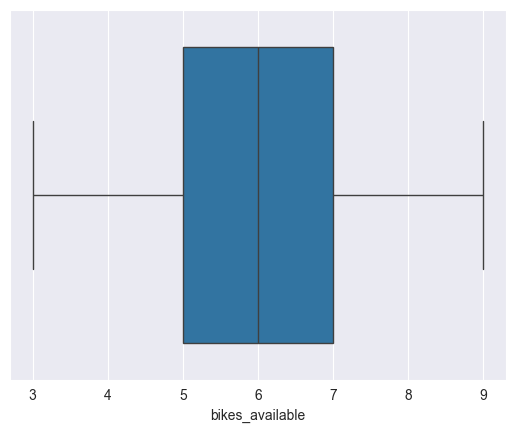

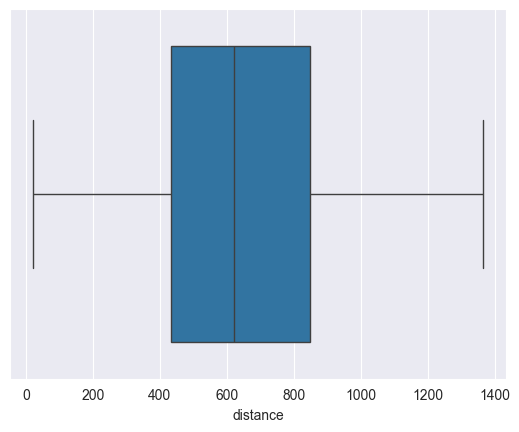

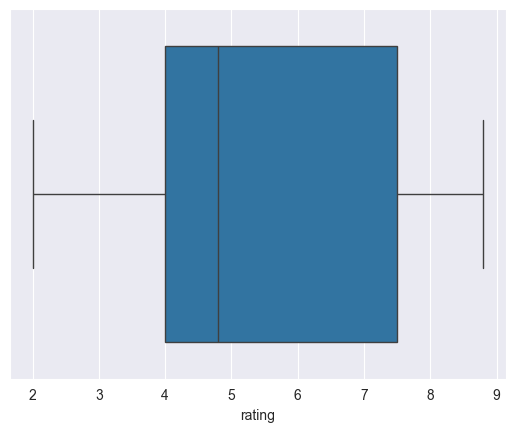

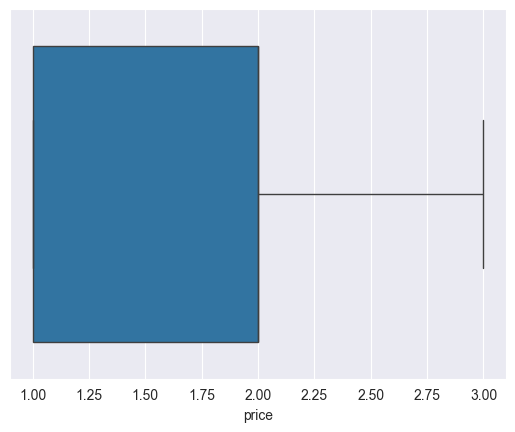

In [418]:
# 8. Detecting Outliers
sns.boxplot(x=df['bikes_available'])
plt.show()
sns.boxplot(x=df['distance'])
plt.show()
sns.boxplot(x=df['rating'])
plt.show()
sns.boxplot(x=df['price'])
plt.show()

In [404]:
# Standard Deviation
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print('IQR:\n', IQR)

IQR:
 price                1.000000
rating               3.300000
distance           435.250000
latitude             0.009223
longitude            0.016697
bikes_available      2.000000
dtype: float64


In [405]:
# Remove outliers 
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'DataFrame after dropping outliers {df.shape}')

DataFrame after dropping outliers (200, 6)


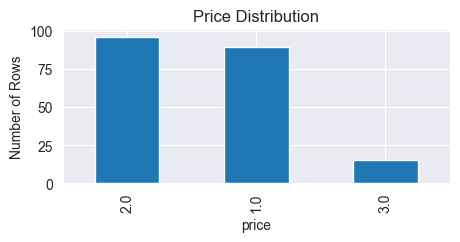

In [406]:
# 9. Plot different features against one another (scatter), 
# against frequency (histogram)
df['price'].value_counts().plot(kind='bar', figsize=(5, 2))
plt.title("Price Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('price');

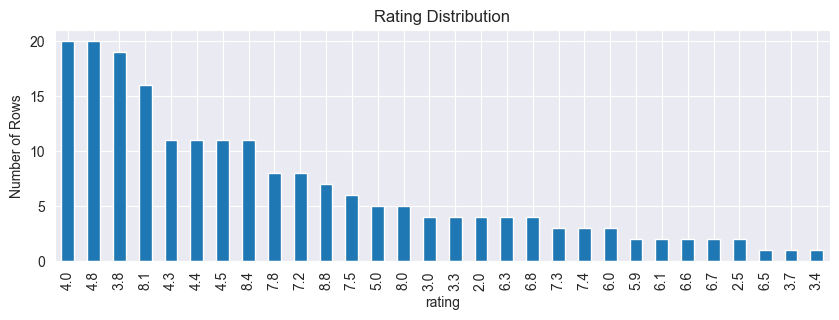

In [407]:
df['rating'].value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("Rating Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('rating');

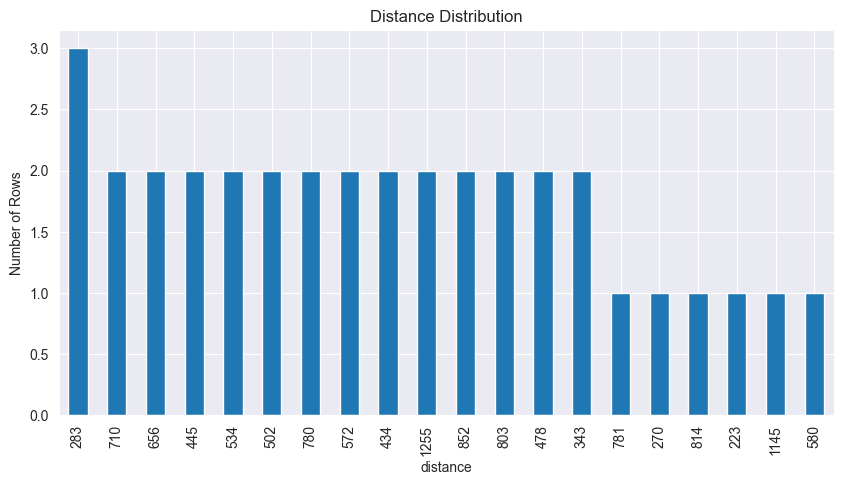

In [408]:
df['distance'].value_counts().nlargest(20).plot(kind='bar', figsize=(10, 5))
plt.title("Distance Distribution")
plt.ylabel('Number of Rows')
plt.xlabel('distance');

                    price    rating  distance  latitude  longitude  \
price            1.000000 -0.051527  0.070338 -0.203030   0.055686   
rating          -0.051527  1.000000 -0.196655 -0.057909  -0.157475   
distance         0.070338 -0.196655  1.000000  0.123462   0.039096   
latitude        -0.203030 -0.057909  0.123462  1.000000   0.002361   
longitude        0.055686 -0.157475  0.039096  0.002361   1.000000   
bikes_available -0.003316 -0.020438  0.093044  0.059109   0.017987   

                 bikes_available  
price                  -0.003316  
rating                 -0.020438  
distance                0.093044  
latitude                0.059109  
longitude               0.017987  
bikes_available         1.000000  


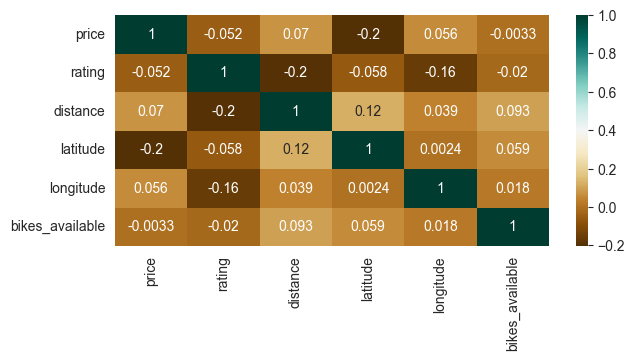

In [409]:
# Heat Maps
plt.figure(figsize=(7, 3))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
print(c)


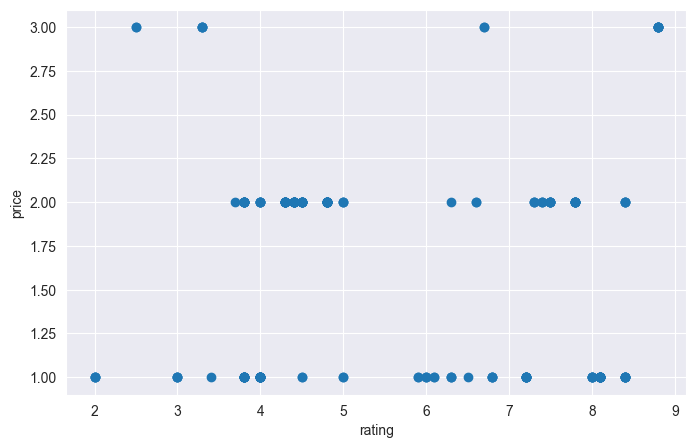

In [410]:
# Scatterplot
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['rating'], df['price'])
ax.set_xlabel('rating')
ax.set_ylabel('price')
plt.show()

### Build a regression model.

In [411]:
# Example: Adding a constant column for regression analysis
df = sm.add_constant(df)
# Display the first few rows
# pri nt(dat.head())

Provide model output and an interpretation of the results. 

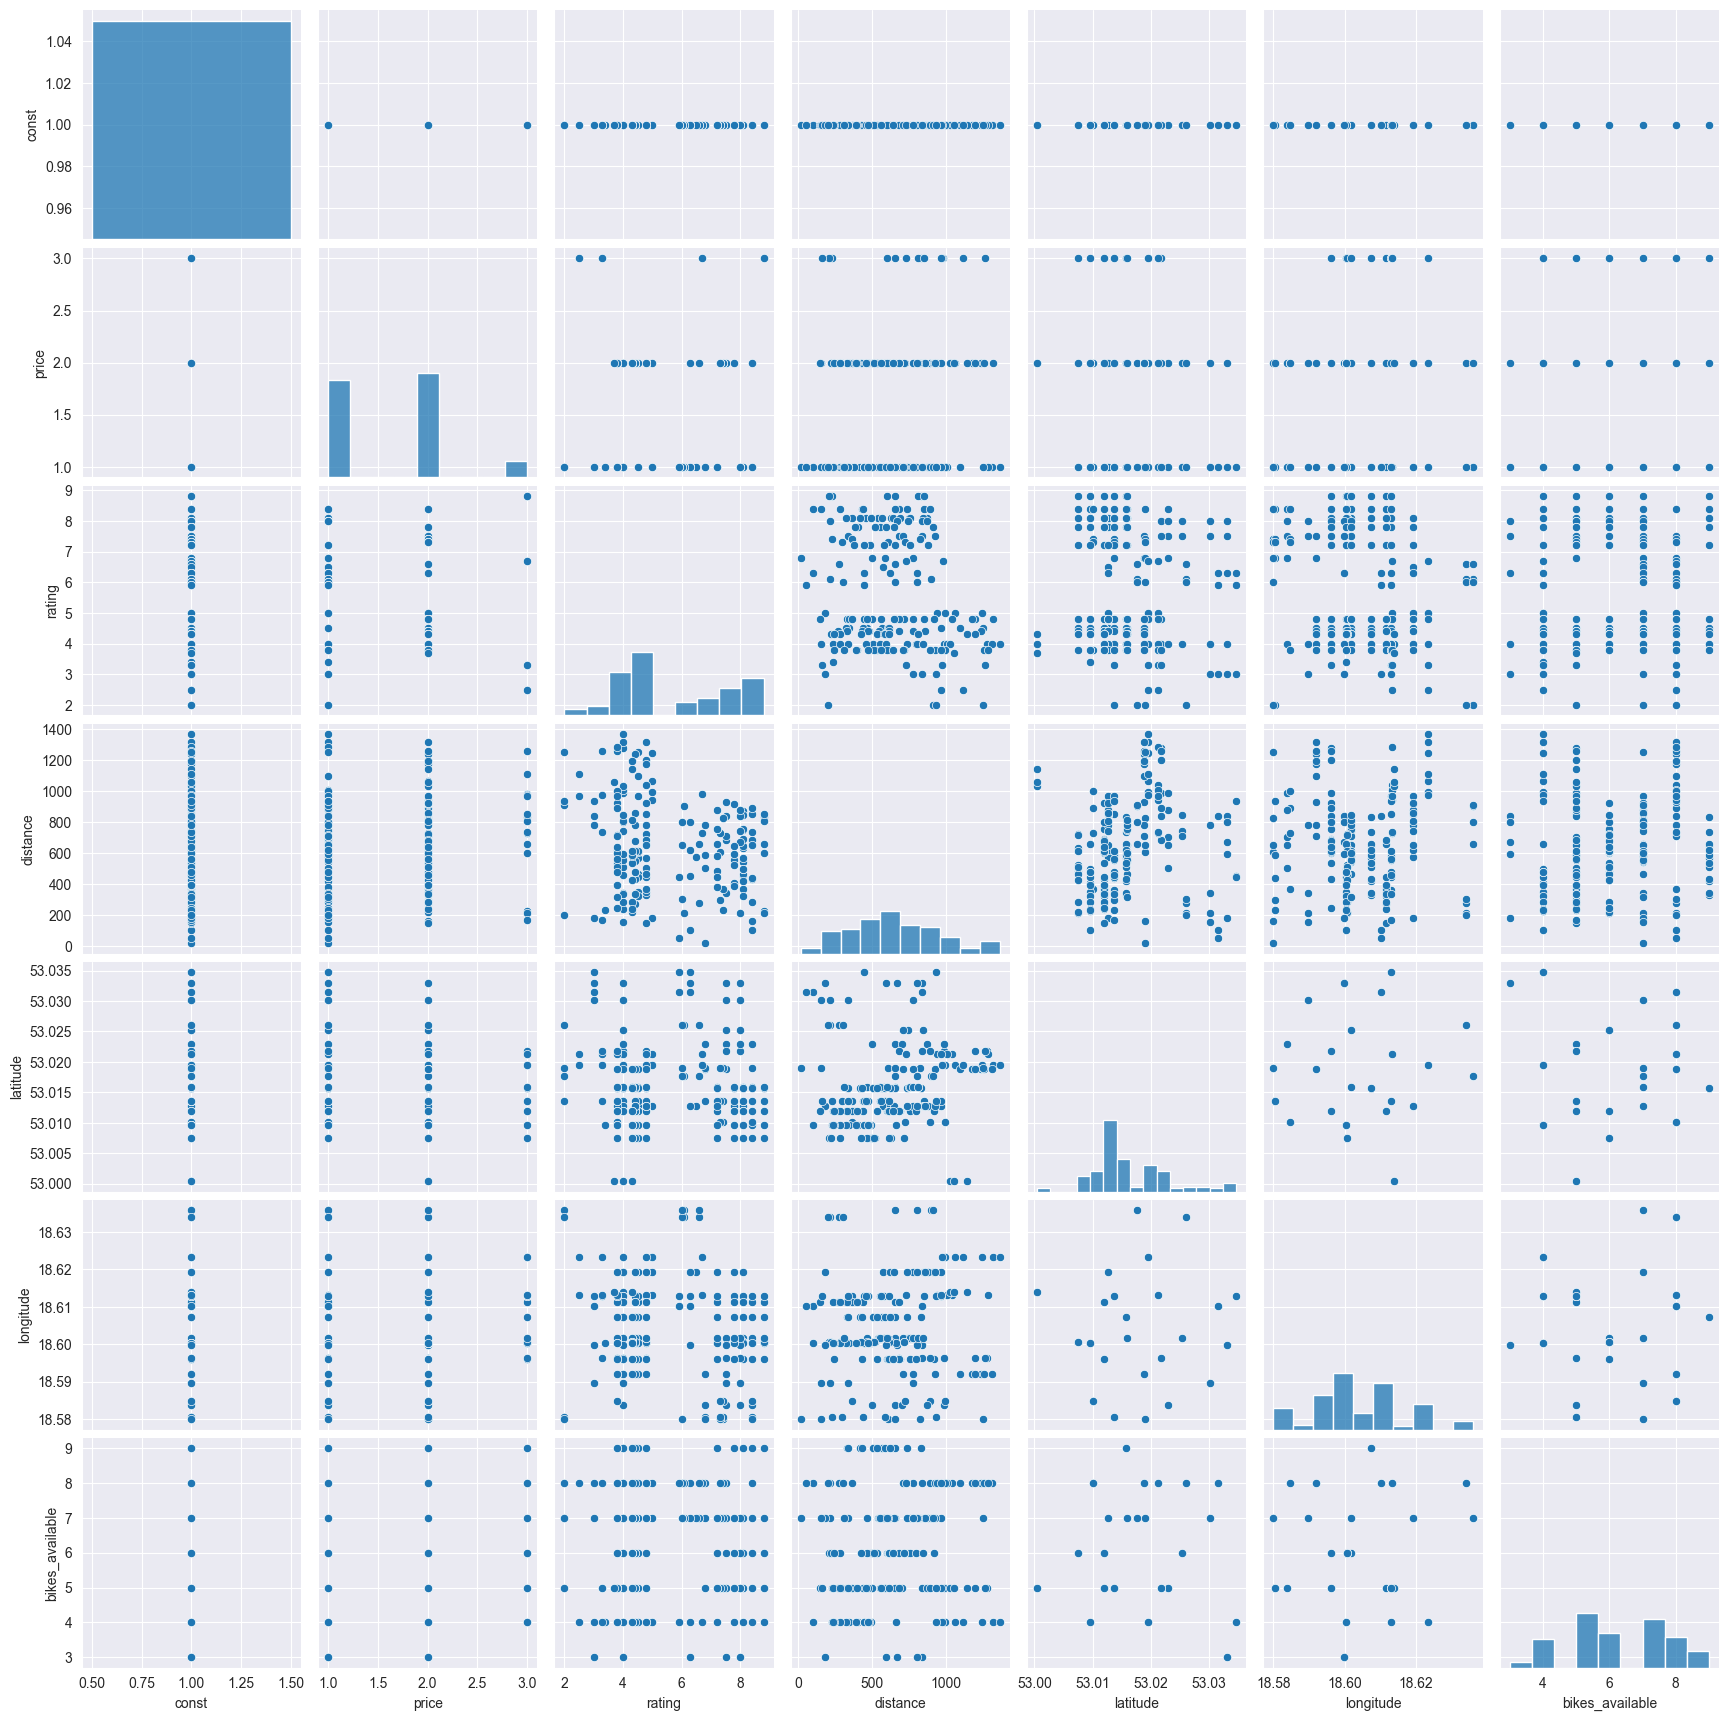

In [412]:
sns.pairplot(data=df)
plt.show()

In [413]:
df.corr(numeric_only=True)

,const,price,rating,distance,latitude,longitude,bikes_available
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,-0.051527,0.070338,-0.203030,0.055686,-0.003316
rating,NaN,-0.051527,1.000000,-0.196655,-0.057909,-0.157475,-0.020438
distance,NaN,0.070338,-0.196655,1.000000,0.123462,0.039096,0.093044
latitude,NaN,-0.203030,-0.057909,0.123462,1.000000,0.002361,0.059109
longitude,NaN,0.055686,-0.157475,0.039096,0.002361,1.000000,0.017987
bikes_available,NaN,-0.003316,-0.020438,0.093044,0.059109,0.017987,1.000000


In [414]:
import scipy

stat, p1 = scipy.stats.pearsonr(df['price'], df['rating'])
stat, p2 = scipy.stats.pearsonr(df['price'], df['distance'])
stat, p3 = scipy.stats.pearsonr(df['rating'], df['distance'])
print(p1, p2, p3)

0.46869173814224824 0.32231289134559676 0.005254593483282813


In [415]:
# Add a constant for the intercept
X = df[['price', 'rating', 'distance']]
X = sm.add_constant(X)  # Adds the intercept term
y = df['distance']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Output the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.598e+31
Date:                Mon, 18 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:21:56   Log-Likelihood:                 5392.6
No. Observations:                 200   AIC:                        -1.078e+04
Df Residuals:                     196   BIC:                        -1.076e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.464e-12   1.68e-13      8.725      0.0

# Stretch

### How can you turn the regression model into a classification model?

#### To transform the regression problem into a classification problem, we change the nature of the dependent variable. Instead of predicting a continuous value (number of bikes), we classify the locations into discrete categories (e.g., low, medium, or high bike availability).

In [416]:
df['price_range'] = pd.cut(
    df['price'],
    bins=[0, 1, 2, float('inf')],
    labels=['Low', 'Medium', 'High']
)
df

,const,price,rating,distance,latitude,longitude,bikes_available,price_range
0,1.0,3.0,8.8,657,53.011939,18.611414,5,High
1,1.0,3.0,8.8,603,53.012029,18.596202,6,High
2,1.0,3.0,8.8,229,53.009622,18.600228,4,High
3,1.0,3.0,8.8,211,53.007485,18.600735,6,High
4,1.0,3.0,8.8,832,53.015745,18.607203,9,High
...,...,...,...,...,...,...,...,...
711,1.0,3.0,2.5,968,53.021252,18.613106,8,High
713,1.0,1.0,2.0,912,53.017646,18.635777,7,Low
718,1.0,1.0,2.0,937,53.013617,18.580471,5,Low
719,1.0,1.0,2.0,204,53.025994,18.633996,8,Low


In [417]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Features and target
X = df[['price', 'rating', 'distance']]
y = df['price_range'].cat.codes  # Convert categories to numeric codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00         3

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

